<a href="https://colab.research.google.com/github/NizarMohd/RunOrWalk/blob/main/Week10MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extract data from txt

In [ ]:

name = ["zihao", "tejas", "zeon"]
gesture = ["nongesture", "shield","grenade", "reload", "wave"]
f_out = open('all_gestures.txt', 'w')
TOTAL_DATA = [[], [], [], [], []]
batch = []
for i in range(0,len(name)):
  for j in range(0, len(gesture)):
    f = open(name[i] + gesture[j] + ".txt")
    lines = f.readlines()
    for line in lines:
      if line != "\n" and line !="unpack requires a buffer of 20 bytes\n":
        data_str = line[0:len(line) -1]
        if data_str[0:5] != "batch" and data_str[0:5] != "Batch":
          f_out.write(str(data_str + "\n"))
          data_str = data_str.replace('(','').replace(')','')
          int_data = []
          batch_data = data_str.split(", ")
          for item in batch_data:
            int_data.append(int(item))
          batch.append(int_data)
        else:
          TOTAL_DATA[j].append(batch)
          batch = []
          f_out.write("Batch")

  
          
        
print(TOTAL_DATA[1][0])






[[16, 60, -22, 0, 0, 0], [15, 59, -22, 0, 0, 0], [15, 59, -22, 0, -1, 0], [16, 58, -23, 0, 0, 0], [16, 59, -23, 0, 0, 0], [17, 59, -23, 0, 0, 0], [17, 58, -21, 0, 0, 0], [17, 59, -21, 0, -1, 0], [17, 59, -21, 0, -1, 1], [17, 60, -22, 0, 0, 1], [15, 60, -22, 0, 0, 0], [16, 59, -22, -1, 0, 0], [16, 58, -23, 0, 0, 0], [16, 59, -22, 0, 0, 0], [15, 59, -24, 0, 0, 0], [14, 58, -27, 0, 0, 0], [16, 55, -33, 2, 3, 2], [15, 51, -42, 14, 20, 1], [-12, 61, -56, 29, 49, -3], [-52, 76, -65, 35, 61, -9], [-104, 90, -77, 27, 44, -37], [-127, 93, -100, 32, -1, -82], [-121, 91, -111, 56, -54, -113], [-79, 101, -122, 91, -58, -127], [-71, 120, -127, 107, -24, -127], [-77, 127, -127, 112, 12, -127], [-108, 127, -127, 122, 16, -127], [-111, 127, -127, 127, -12, -127], [-125, 127, -127, 127, -42, -127], [-121, 127, -127, 127, -97, -127], [-107, 127, -127, 127, -121, -127], [-86, 127, -127, 127, -127, -127], [-65, 127, -127, 127, -127, -127], [-48, 127, -127, 127, -127, -127], [-16, 127, -127, 127, -127, -12

Visualise Data (Shield)

ax


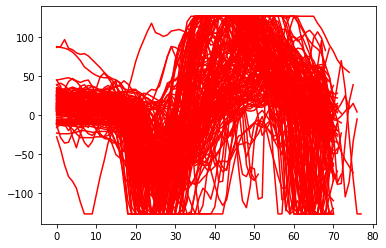

ay


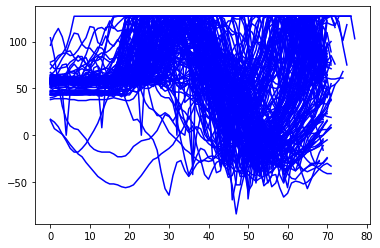

az


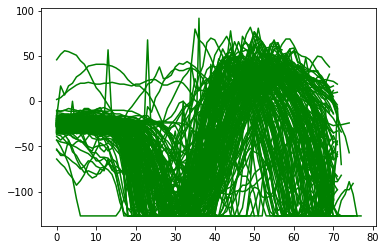

gx


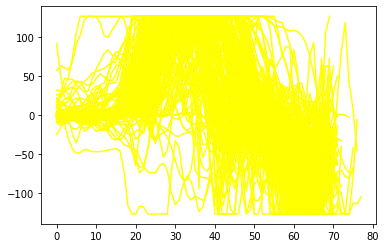

gy


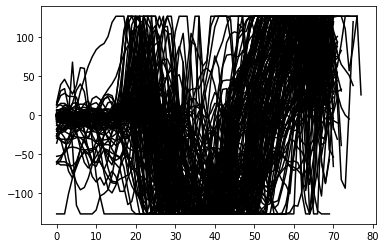

gz


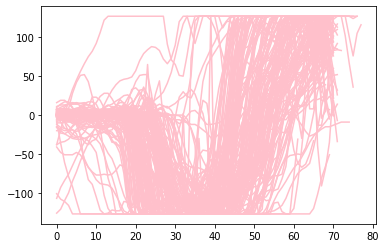

In [ ]:

import matplotlib.pyplot as plt
import numpy as np


shield = TOTAL_DATA[1]
ATTR = {0: "ax", 1: "ay", 2: "az", 3: "gx", 4: "gy", 5: "gz", 6: "tbuff"}
color = {0: "red", 1: "blue", 2: "green", 3: "yellow", 4: "black", 5: "pink"}


for i in range(0, 6):
  print(ATTR[i])
  for gesture in shield:
    buffer=[]
    for datapoint in gesture:
          buffer.append(datapoint[i])
  # peaks_buf[attr%7].append(sum_peaks/10)
  # peaks2_buf[attr%7].append(sum_peaks2/10)
    plt.plot(np.array(buffer), color=color[i])

  
  plt.show()

Visualise Data (Grenade)

ax


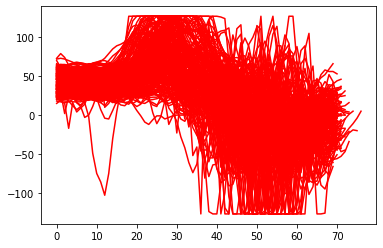

ay


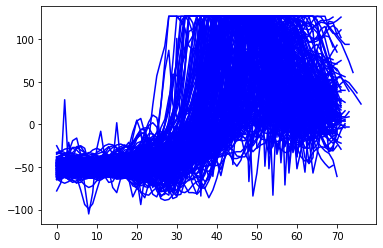

az


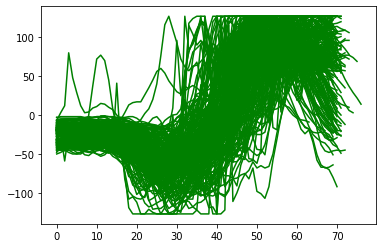

gx


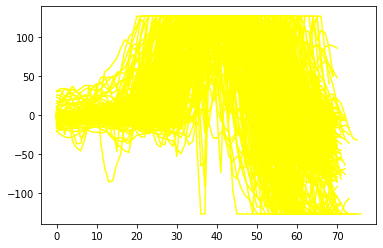

gy


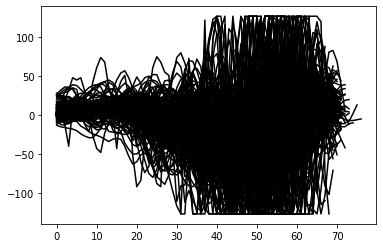

gz


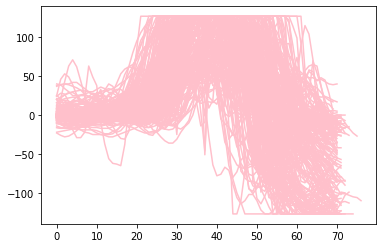

In [ ]:
grenade = TOTAL_DATA[2]
for i in range(0, 6):
  print(ATTR[i])
  for gesture in grenade:
    buffer=[]
    for datapoint in gesture:
          buffer.append(datapoint[i])
  # peaks_buf[attr%7].append(sum_peaks/10)
  # peaks2_buf[attr%7].append(sum_peaks2/10)
    plt.plot(np.array(buffer), color=color[i])

  
  plt.show()

Visualise Data (Reload)

ax


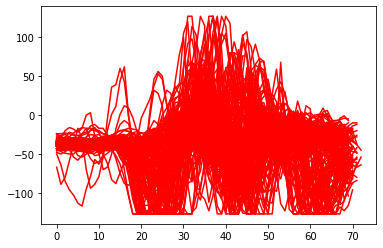

ay


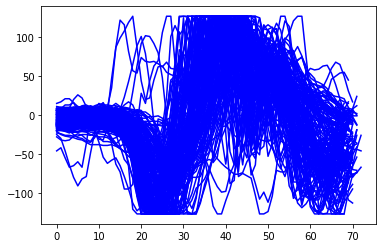

az


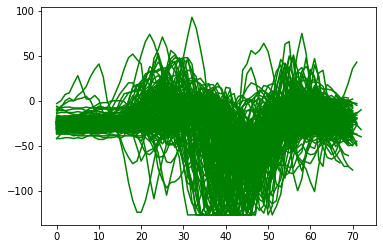

gx


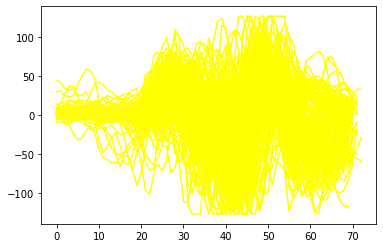

gy


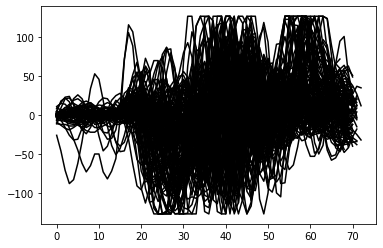

gz


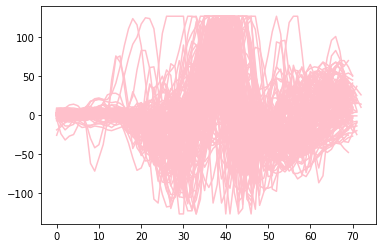

In [ ]:
reload = TOTAL_DATA[3]
for i in range(0, 6):
  print(ATTR[i])
  for gesture in reload:
    buffer=[]
    for datapoint in gesture:
          buffer.append(datapoint[i])
  # peaks_buf[attr%7].append(sum_peaks/10)
  # peaks2_buf[attr%7].append(sum_peaks2/10)
    plt.plot(np.array(buffer), color=color[i])

  
  plt.show()

Visualise Data (Logout)

ax


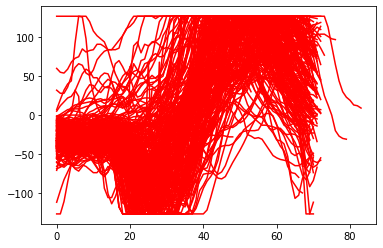

ay


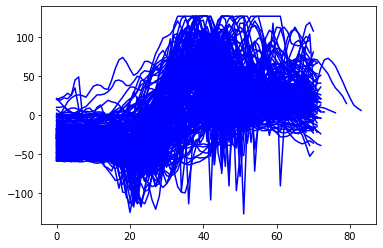

az


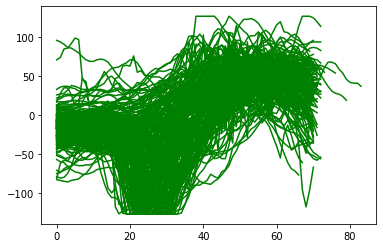

gx


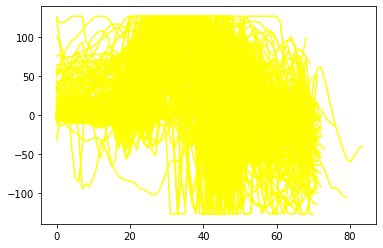

gy


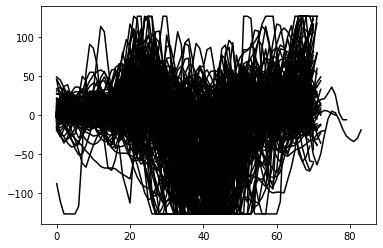

gz


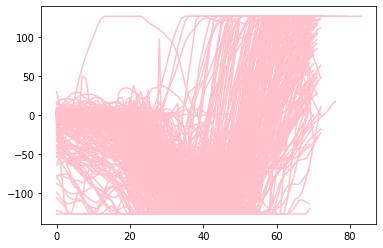

In [ ]:
logout = TOTAL_DATA[4]
for i in range(0, 6):
  print(ATTR[i])
  for gesture in logout:
    buffer=[]
    for datapoint in gesture:
          buffer.append(datapoint[i])
  # peaks_buf[attr%7].append(sum_peaks/10)
  # peaks2_buf[attr%7].append(sum_peaks2/10)
    plt.plot(np.array(buffer), color=color[i])

  
  plt.show()


Visualise Data (Non-Gesture)

ax


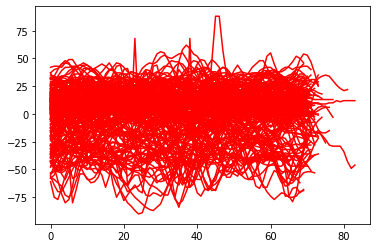

ay


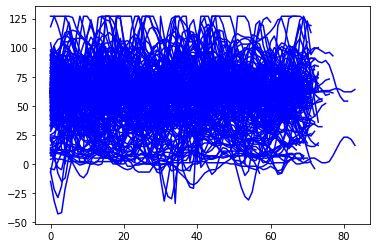

az


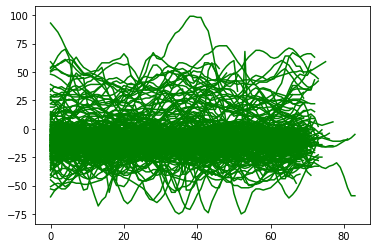

gx


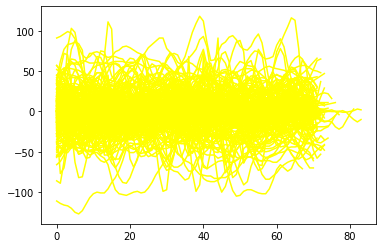

gy


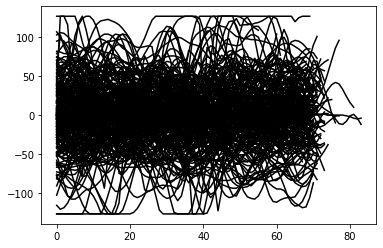

gz


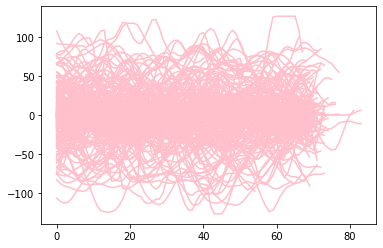

In [ ]:
nongesture = TOTAL_DATA[0]
for i in range(0, 6):
  print(ATTR[i])
  for gesture in nongesture:
    buffer=[]
    for datapoint in gesture:
          buffer.append(datapoint[i])
  # peaks_buf[attr%7].append(sum_peaks/10)
  # peaks2_buf[attr%7].append(sum_peaks2/10)
    plt.plot(np.array(buffer), color=color[i])

  
  plt.show()

Extract Features

In [ ]:
import time 
import pandas as pd
import numpy as np
from scipy import stats
import math
import time
from scipy.fft import fft, fftfreq
import csv
SAMPLE_RATE = 77
DURATION = 1
N_SAMPLE = SAMPLE_RATE * DURATION

f_out = open("features_int.csv", "w", newline = "", encoding="utf-8")

csvwriter = csv.writer(f_out)
csvwriter.writerow(["min ax", "max ax", "mean ax", "median ax", "mad ax", "sd ax", "iqr ax", "entropy ax", "rms ax", "range_ax", "avg magf ax", "madf ax", "tdiff ax",\
                    "min ay", "max ay", "mean ay", "median ay", "mad ay", "sd ay", "iqr ay", "entropy ay", "rms ay", "range_ay", "avg magf ay", "madf ay",  "tdiff ay", \
                    "min az", "max az", "mean az", "median az", "mad az", "sd az", "iqr az", "entropy az",  "rms az", "range_az","avg magf az", "madf az",  "tdiff az",  \
                    "min gx", "max gx", "mean gx", "median gx", "mad gx", "sd gx", "iqr gx", "entropy gx",  "rms gx", "range_gx", "avg magf gx", "madf gx",  "tdiff gx", \
                    "min gy", "max gy", "mean gy", "median gy", "mad gy", "sd gy", "iqr gy", "entropy gy", "rms gy", "range_gy", "avg magf gy", "madf gy",  "tdiff gy", \
                    "min gz", "max gz", "mean gz", "median gz", "mad gz", "sd gz", "iqr gz", "entropy gz", "rms gz",  "range_gz","avg magf gz", "madf gz",  "tdiff gz", \
                    "corr ax ay", "corr ax az", "corr ax gx", "corr ax gy", "corr ax gz", "corr ay az", "corr ay gx", "corr ay gy", "corr ay gz",  "corr az gx", "corr az gy",\
                    "corr az gz",  "corr gx gy", "corr gx gz", "corr gy gz", \
                    "label"])

min_buf = []
max_buf = []
mean_buf = []
median_buf = []
mad_buf = []
sd_buf = []
iqr_buf = []
entropy_buf = []
skew_buf = []
kurt_buf = []
rms_buf = []
range_buf = []
avg_magf_buf = []
madf_buf = []
tdiff = []
i_min = []
i_max = []
time_elapsed = []
corr_buf = []

for gidx in range(0, 5):
  gesture_data = TOTAL_DATA[gidx]
  for datapoint in gesture_data:
    buffer = [[],[],[],[],[],[]]
    for k in range(len(datapoint)):
      for j in range(0, 6):
        buffer[j].append(datapoint[k][j])
    start = time.time()    
    for j in range(0, 6):
      for i in range(j+1, 6):
        corr = np.corrcoef(buffer[j], buffer[i])
        corr_buf.append(corr[0,1])
    for j in range(0, 6):
      data = buffer[j]
      f_v = {}
        # each data is 1s window of one attr
      for item in data:
        if item in f_v:
          f_v[item] =  f_v[item] + 1
        else:
          f_v[item] = 1
      N = len(data)

      min_buf.append(min(data))
      max_buf.append(max(data))
      i_min.append(np.argmin(data))
      i_max.append(np.argmax(data))
      range_buf.append(max(data) - min(data))

      # print("min: " + str(min_v))
      # print("max: " + str(max_v))


      mean = np.mean(data)
      mean_buf.append(mean)

      median = np.median(data)
      median_buf.append(median)

      q3, q1 = np.percentile(np.array(data), [75 ,25])
      iqr = q3 - q1
      iqr_buf.append(iqr)

      n2 = 0
      n3 = 0
      n4 = 0
      h = 0
      mad = 0
      rms = 0

      for item in data:
        rms = rms + item**2
        n2 = (item - mean)**2 + n2
        n3 = (item - mean)**3 + n3
        n4 = (item - mean)**4 + n4
        mad = abs(item - mean) + mad
        p_i = f_v[item]/N

        h = p_i * math.log(p_i, 2) + h

      variance = n2 / (N - 1)
      sd = math.sqrt(variance)
      sd_buf.append(sd)

      # print("sd: " + str(sd)) 
      mad = mad / N
      mad_buf.append(mad)

      rms = math.sqrt(rms/N)
      rms_buf.append(rms)

      entropy_buf.append(-1*h)
      skew = (n3/N)/ math.pow((n2/N), 1.5)
      skew_buf.append(skew)

      kurt = (n4/N)/ (n2/N)**2 - 3
      kurt_buf.append(kurt)
      yf = fft(np.array(data))
      xf = fftfreq(N, 1 / SAMPLE_RATE)
      avg_magf= 0
      for i in range(len(xf)):
        avg_magf = np.abs(yf[i]) + avg_magf
      avg_magf = avg_magf/len(xf)
      avg_magf_buf.append(avg_magf)

      madf = 0
      for i in range(len(xf)):
        madf = madf + abs(np.abs(yf[i]) - mean)
      madf = madf / len(xf)
      madf_buf.append(madf)
      
    
    all = []
    for i in range(len(i_min)):
        tdiff.append(i_max[i] - i_min[i])
        

    for i in range (len(min_buf)):
      all.append(round(min_buf[i]))
      all.append(round(max_buf[i]))
      all.append(round(mean_buf[i]))
      all.append(round(median_buf[i]))
      all.append(round(mad_buf[i]))
      all.append(round(sd_buf[i]))
      all.append(round(iqr_buf[i]))
      all.append(round(entropy_buf[i]))
      all.append(round(rms_buf[i]))
      all.append(round(range_buf[i]))
      all.append(round(avg_magf_buf[i]))
      all.append(round(madf_buf[i]))
      all.append(round(tdiff[i]))
    for item in corr_buf:
      if math.isnan(item):
        item = 0
      all.append(round(item* 10**2))
    all.append(gidx)
    
    print(all)
    end = time.time()
    time_elapsed.append(end-start)
    csvwriter.writerow(all)
    i_min = []
    i_max = []

    min_buf = []
    max_buf = []
    mean_buf = []
    median_buf = []
    mad_buf = []
    sd_buf = []
    tdiff = []
    iqr_buf = []
    entropy_buf = []
    skew_buf = []
    kurt_buf = []
    rms_buf = []
    range_buf= []
    avg_magf_buf = []
    madf_buf = []
    t_diff = []
    corr_buf = []

print("Avg time elapsed: " + str(np.mean(time_elapsed)))
f_out.close()
    

[5, 12, 9, 9, 1, 2, 2, 26, 9, 7, 17, 16, -33, 60, 65, 62, 62, 1, 1, 1, 28, 62, 5, 68, 116, 17, -12, -7, -9, -9, 1, 1, 1, 30, 10, 5, 16, 25, 7, -1, 3, 1, 0, 1, 1, 1, 29, 1, 4, 6, 5, 17, -12, 5, -2, 0, 4, 5, 7, 19, 5, 17, 19, 21, -27, -3, 3, 0, 0, 1, 1, 2, 29, 1, 6, 7, 7, 35, 13, 56, 5, 4, -27, 22, -7, 12, -3, 40, -15, -25, -29, -5, -34, 0]
[6, 12, 10, 10, 1, 2, 2, 37, 10, 6, 18, 18, -30, 60, 66, 62, 62, 1, 1, 1, 39, 62, 6, 70, 116, 43, -11, -5, -9, -9, 1, 1, 1, 40, 9, 6, 17, 25, 6, -1, 3, 0, 0, 1, 1, 0, 30, 1, 4, 6, 6, 41, -7, 5, -1, 0, 2, 2, 2, 32, 2, 12, 13, 13, -9, -1, 6, 1, 0, 1, 1, 1, 40, 1, 7, 9, 8, 69, 16, 23, 32, -3, -1, 24, 6, 7, 12, 37, 3, 10, -6, 44, -40, 0]
[-36, 19, -6, -4, 8, 10, 13, 12, 12, 55, 66, 71, 4, -7, 81, 57, 60, 11, 16, 14, 11, 59, 88, 156, 116, 28, -5, 24, 4, 2, 5, 7, 5, 20, 7, 29, 33, 30, 27, -35, 49, 3, 4, 11, 15, 14, 12, 15, 84, 77, 75, -11, -32, 60, 2, 0, 13, 18, 21, 11, 18, 92, 100, 99, 4, -16, 51, 8, 6, 9, 13, 12, 12, 15, 67, 79, 72, 9, 12, -15, -15, 17, -

Check Correlation

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv('features_int.csv') #Replace it with your path where the data file is stored
df.head()
df.describe()
correlation = df.corr()
pd.set_option('display.max_rows', None)
print(correlation['label'])


# plt.figure(figsize=(73,73))
# sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

# plt.title('Correlation between different features')

min ax        -0.552311
max ax         0.461287
mean ax       -0.089460
median ax     -0.279174
mad ax         0.612267
sd ax          0.607899
iqr ax         0.545240
entropy ax    -0.307859
rms ax         0.686309
range_ax       0.594263
avg magf ax    0.597949
madf ax        0.623530
tdiff ax       0.217221
min ay        -0.732782
max ay        -0.178824
mean ay       -0.774385
median ay     -0.674403
mad ay         0.399858
sd ay          0.418275
iqr ay         0.336159
entropy ay    -0.351108
rms ay        -0.495631
range_ay       0.465692
avg magf ay    0.198861
madf ay        0.260930
tdiff ay       0.448061
min az        -0.358407
max az         0.364370
mean az        0.189294
median az      0.136707
mad az         0.322324
sd az          0.367023
iqr az         0.228594
entropy az    -0.494926
rms az         0.287297
range_az       0.459639
avg magf az    0.350843
madf az        0.276538
tdiff az       0.238756
min gx        -0.248914
max gx         0.521596
mean gx        0

Check GPU Usage

In [ ]:
# Check if runtime uses GPU
import torch

gpu_name = torch.cuda.get_device_name(0)

print("Using GPU", gpu_name)

Using GPU Tesla P100-PCIE-16GB


Load Dataset

In [ ]:

# importing the libraries
import pandas as pd
import numpy as np

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.utils.data import Dataset
from torch.utils.data import Sampler
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Dropout
from torch.optim import Adam, SGD
import tensorflow as tf
from torchvision import transforms
from torchvision.transforms import *
from sklearn.utils import shuffle

datasets = pd.read_csv('features_int.csv')
datasets.dropna()
datasets = shuffle(datasets)


# train_set, test_set = train_test_split(datasets, test_size = 0.1)
# train_set = train_set.dropna()

# print(len(train_set))


# test_set, val_set = train_test_split(test_set, test_size = 0.5)
# test_set.dropna()
# val_set.dropna()

k_fold = 10
seg = round(1/k_fold * len(datasets))
class MyDataset(Dataset):
  
    def __init__(self, type, k):

      # # compute k_fold segments
      val_l = int(seg * k)
      val_r = int(val_l + seg)

      test_set = datasets.iloc[val_l:val_r]
      train_set = datasets
      training_set = train_set.drop(test_set.index)
      if type == "train":
        self.data = training_set
      elif type == "test":
        self.data = test_set
      # elif type == "val":
      #   self.data = val_set
      print(f'loaded data with dataset size {len(self)}')
      # print("Val left index: " + str(val_l))
      # print("Val right index: " + str(val_r))
 
      
    def __getitem__(self, idx):
        classes = 5
        # print(self.data.iloc[idx])
        # sys.stdout.flush()
        item = self.data.iloc[idx] 
        # image = []
        # for index in CORR_FEATURES:
        #   image.append(item[index])
        image = item[0:93]

        label = item[93]
        image = torch.from_numpy(np.array(image))
        labels = []
        for i in range(classes):
            if i == label:
              labels.append(1)
            else:
              labels.append(0)
        labels = torch.IntTensor(labels)
        return image, labels

    def __len__(self):
        return len(self.data)


MLP Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class Model(nn.Module):
  
  def __init__(self):
    super(Model, self).__init__()
    n_input = 93
    n_h1 = 512
    n_h2 = 256
    n_h3 = 64
    # n_h4 = 16
    n_output = 5

    self.h1 = nn.Linear(n_input, n_h1)
    self.h2 = nn.Linear(n_h1, n_h2)
    self.h3 = nn.Linear(n_h2, n_h3)
    # self.h4 = nn.Linear(n_h3, n_h4)
    self.output = nn.Linear(n_h3, n_output)

    print(self)
  
  def forward(self, x):
    x = F.relu(self.h1(x))
    x = F.relu(self.h2(x))
    x = F.relu(self.h3(x))
    # x = F.relu(self.h4(x))
    x = self.output(x)
    return x


Train Model

In [ ]:
from torch import optim
from sklearn.model_selection import StratifiedKFold

confusion_matrix = [[0,0, 0,0, 0], [0,0,0, 0, 0], [0,0,0, 0, 0], [0,0,0, 0, 0], [0,0,0, 0, 0]]
def accuracy_score(outputs, targets):
  sum = 0
  batch_size = targets.size(0)
  global confusion_matrix
  for i in range(batch_size):
    index_O = outputs.cpu().data.numpy()[i].argmax()
    index_T = targets.cpu().data.numpy()[i].argmax()
    confusion_matrix[index_O][index_T] = confusion_matrix[index_O][index_T] + 1

    if index_O == index_T:
      sum = sum + 1
  return sum / batch_size

def train():
  batch_size = 1
  num_epochs = 30
  num_workers = 2

  train_score = []
  test_score = []
  for k in range(k_fold):
    print("Doing K-fold: " + str(k))
    global confusion_matrix
    model = Model()
    model = model.cuda().float()
   
    loss_fn = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(),lr = 0.000008, momentum= 0.9, nesterov = True)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=1, factor=0.3, verbose=True)
    
    train_set = MyDataset("train", k)
    validation_set = MyDataset("test", k)

    train_loader = torch.utils.data.DataLoader(
          train_set, batch_size=batch_size, num_workers=num_workers, pin_memory=True, shuffle=True)
    validation_loader = torch.utils.data.DataLoader(
          validation_set, batch_size=batch_size, num_workers=num_workers, pin_memory=True, shuffle=False)

    for epoch in range(num_epochs):
      train_loss, valid_loss = [], []
      train_acc , val_acc = [], []
      # train
      model.train()

      # #quantize model
      # model.qconfig = torch.quantization.get_default_qat_qconfig('fbgemm')
      # model = torch.quantization.prepare_qat(model, inplace=True)

      for i, (data, target) in enumerate(train_loader):
          data, target = data.cuda().float(), target.cuda().float()
          # clear gradients
          optimizer.zero_grad()

          # forward prop
          prediction = model(data)

          # loss calculation
          loss = loss_fn(prediction, target)

          #backward prop
          loss.backward()

          ## weight optimization
          optimizer.step()
  
          train_loss.append(loss.item())
          train_acc.append(accuracy_score(prediction, target))

          # if i % 100 == 99:
          #         print(f'training: iteration {i} / {len(train_loader)}, avg train loss = {np.mean(train_loss):.4f}, '
          #               f'train accuracy {np.mean(train_acc):.4f}')
      
      # eval
      model.eval()
      for i, (data, target) in enumerate(validation_loader):
          data, target = data.cuda().float(), target.cuda().float()
          prediction = model(data)
          loss = loss_fn(prediction, target)
          valid_loss.append(loss.item())
          val_acc.append(accuracy_score(prediction, target))

          # if i % 100 == 99:
          #         print(f'validation: iteration {i} / {len(validation_loader)}, avg val loss = {np.mean(valid_loss):.4f}, '
          #               f'val accuracy {np.mean(val_acc):.4f}')

      # epoch summary
      print("Epoch:", epoch, "Train Loss:", np.mean(train_loss), "Train acc:", np.mean(train_acc), "Val Loss:", np.mean(valid_loss), "Val Acc:",  np.mean(val_acc), "Confusion matrix: " , confusion_matrix)
      confusion_matrix = [[0,0, 0,0, 0], [0,0,0, 0, 0], [0,0,0, 0, 0], [0,0,0, 0, 0], [0,0,0, 0, 0]]
      # lr scheduler
      scheduler.step(np.mean(valid_loss))

      # # checkpoint
      # if epoch % 2 == 10:
      #     torch.save(model.state_dict(), f'ckpt_e{epoch}.pth')
      
    torch.save(model.state_dict(), 'Model' + str(k) +'.pth')
    train_score.append(np.mean(train_acc))
    test_score.append(np.mean(val_acc))



  

if __name__ == "__main__":
    train()


Doing K-fold: 0
Model(
  (h1): Linear(in_features=93, out_features=512, bias=True)
  (h2): Linear(in_features=512, out_features=256, bias=True)
  (h3): Linear(in_features=256, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=5, bias=True)
)
loaded data with dataset size 912
loaded data with dataset size 101
Epoch: 0 Train Loss: 0.19004747223822815 Train acc: 0.7817982456140351 Val Loss: 0.08365309964588816 Val Acc: 0.9603960396039604 Confusion matrix:  [[154, 3, 18, 3, 5], [42, 130, 4, 8, 7], [23, 7, 190, 4, 19], [19, 7, 3, 137, 3], [12, 6, 6, 4, 199]]
Epoch: 1 Train Loss: 0.06909531343166907 Train acc: 0.9429824561403509 Val Loss: 0.05988181423912249 Val Acc: 0.9801980198019802 Confusion matrix:  [[215, 1, 1, 0, 3], [11, 149, 0, 0, 1], [14, 0, 218, 0, 6], [3, 1, 0, 155, 1], [7, 2, 2, 1, 222]]
Epoch: 2 Train Loss: 0.04981835562023008 Train acc: 0.9671052631578947 Val Loss: 0.05473154188954447 Val Acc: 1.0 Confusion matrix:  [[231, 0, 0, 0, 4], [8, 150, 0, 0, 

Pick Best Model and extract Weights

In [ ]:
from torch import nn
import torch
import torch.quantization.quantize_fx as quantize_fx
import copy
import csv


modelnum = 1
my_model = Model()
my_model = my_model.cuda()
my_model.eval()
my_model.load_state_dict(torch.load('Model' + str(modelnum)+ '.pth'))


w1 = []
w2 = []
w3 = []
w4 = []

b1 = []
b2 = []
b3 = []
b4 = []

n_input = 93
n_h1 = 512
n_h2 = 256
n_h3 = 64
n_output = 5

confusion_matrix = [[0,0, 0,0, 0], [0,0,0, 0, 0], [0,0,0, 0, 0], [0,0,0, 0, 0],  [0,0,0, 0, 0]]
for param_tensor in my_model.state_dict():
    # get each layer, print layer size
    print(param_tensor, "\t", my_model.state_dict()[param_tensor].size())
    print("\n")
    print(param_tensor, "\t", my_model.state_dict()[param_tensor])
    print("\n")

    # prepare min,max of each layer
    layer = my_model.state_dict()[param_tensor]

    out = []

    
    r = 0
  

    if param_tensor == 'h1.weight' or param_tensor == 'h2.weight'  or param_tensor == 'h3.weight' or param_tensor == 'output.weight':
      #layer is 2D array
      for row in layer:
        r = r + 1
        for item in row:
          y = item.item() * (10**3)
          out.append(round(y))
          if param_tensor == 'h1.weight':
            w1.append(round(y))
          elif param_tensor == 'h2.weight':
            w2.append(round(y))
          elif param_tensor == 'h3.weight':
            w3.append(round(y))
          else:
            w4.append(round(y))
          

      
    else:
      # layer is 1D array
      for item in layer:
          r = r + 1
          y = item.item() * (10**3)
          
          out.append(round(y))
          if param_tensor == 'h1.bias':
            b1.append(round(y))
          elif param_tensor == 'h2.bias':
            b2.append(round(y))
          elif param_tensor == 'h3.bias':
            b3.append(round(y))
          else:
            b4.append(round(y))

    print(r)
    print(out)
    
    print("\n")


#  compute accuracy of quantized weights
test_acc = []
for i in range(k_fold):

  test_set = MyDataset("test",i)
  batch_size = 64


  # mp.set_start_method('spawn', force=True)
  test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, \
                    shuffle=False)

  # test accuracy
  



  for k, (image,label) in enumerate(test_loader):
          
          acc = 0
          idx = 0
          preds = []
          for data in image:
            z1 = []
            z2 = []
            z3 = []
            z4 = []
            # 24 attr, 64 data
            # compute Z1 = W1x + b1
            j = 0
            z = 0
            x = data.numpy()
            for i in range(0, n_h1 * n_input):
              z = w1[i] * x[i%n_input] + z
              if i% n_input == n_input - 1:
                z = z + b1[j]
                j = j + 1
                if z < 0:
                  z = 0
                z1. append(round(z/1000))
                z = 0
            

            # compute z2 = w2 * z1 + b2
            j = 0
            z = 0
            for i in range(0, n_h2 * n_h1):
              z = w2[i] * z1[i%n_h1] + z
              if i% n_h1 == n_h1 - 1:
                z = z + b2[j]
                j = j + 1
                if z < 0:
                  z = 0
                z2.append(round(z/1000))
                z = 0 
            
            j = 0
            z = 0
            for i in range(0, n_h3 * n_h2):
              z = w3[i] * z2[i%n_h2] + z
              if i% n_h2 == n_h2 - 1:
                z = z + b3[j]
                j = j + 1
                if z < 0:
                  z = 0
                z3.append(round(z/1000))
                z = 0 

            j = 0
            z = 0
            for i in range(0, n_output * n_h3):
              z = w4[i] * z3[i%n_h3] + z
              if i% n_h3 == n_h3-1:
                z = z + b4[j]
                j = j + 1
                if z < 0:
                  z = 0
                z4.append(round(z))
                z = 0 
            
          
            pred = np.argmax(np.asarray(z4))
            preds.append(pred)

          sum = 0
          for i in range(label.size(0)):
            i_o = preds[i]
            i_t = np.argmax(label[i].numpy())
            confusion_matrix[i_o][i_t] = confusion_matrix[i_o][i_t] + 1
            if i_o == i_t:
              sum = sum + 1
          test_acc.append(sum/label.size(0))
          print(sum/label.size(0))
print(np.mean(test_acc))  
print(confusion_matrix)

Model(
  (h1): Linear(in_features=93, out_features=512, bias=True)
  (h2): Linear(in_features=512, out_features=256, bias=True)
  (h3): Linear(in_features=256, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=5, bias=True)
)
h1.weight 	 torch.Size([512, 93])


h1.weight 	 tensor([[ 0.0575, -0.0754, -0.0512,  ..., -0.0851,  0.0370, -0.0519],
        [-0.0041, -0.0425, -0.0983,  ..., -0.0108,  0.0083,  0.0582],
        [-0.0364,  0.0887,  0.0638,  ..., -0.0716, -0.0683,  0.0410],
        ...,
        [-0.0157,  0.0842, -0.0728,  ..., -0.0899, -0.0433,  0.0712],
        [-0.0912,  0.0009,  0.0636,  ..., -0.0964,  0.0671,  0.0327],
        [-0.0963, -0.0772, -0.0407,  ...,  0.0272,  0.0360, -0.0514]],
       device='cuda:0')


512
[57, -75, -51, -40, -40, 100, -70, 68, -23, -101, -26, 76, -54, 74, 20, -39, 25, 71, 74, 34, 49, 44, 8, 11, -95, 99, 80, -12, 42, -34, 36, -34, 58, -73, 39, 27, -28, 78, 85, 42, 94, 28, -84, 44, -98, -57, 2, -8, 18, -80, 77, -50, -32, -